# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
clean_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = clean_data["Mouse ID"].nunique()
num_clean_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = clean_data.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_volume_stats = grouped_data["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    variance="var",
    std_dev="std",
    sem="sem"
).reset_index()
 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_stats

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    variance="var",
    std_dev="std",
    sem="sem"
).reset_index()

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

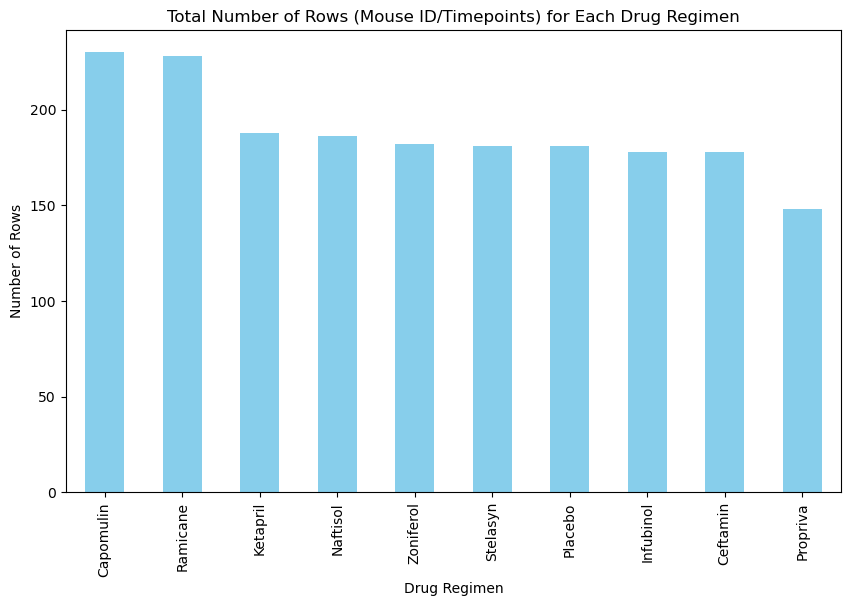

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data["Drug Regimen"].value_counts()

# Generate a bar plot
regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Set plot title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Display the plot
plt.show()

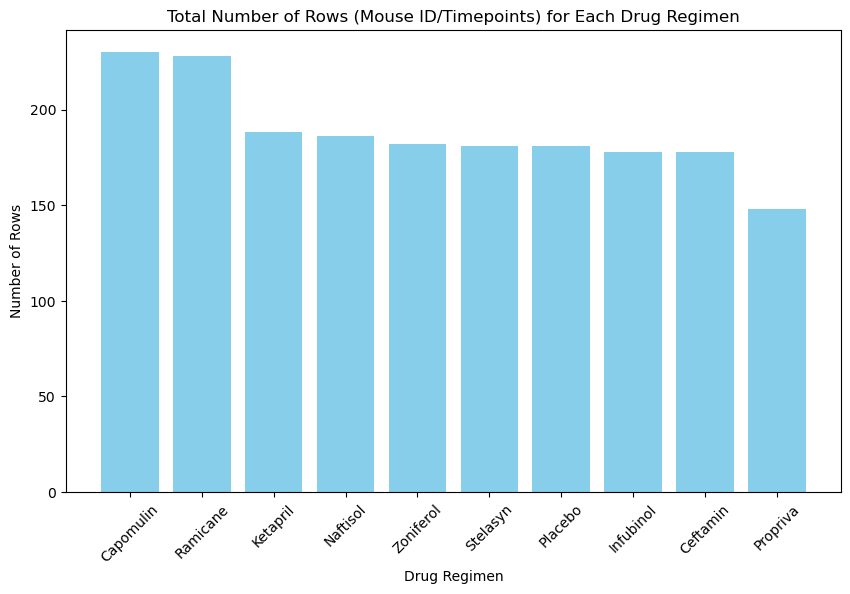

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_data["Drug Regimen"].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')

# Set plot title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)  # Rotate the x labels for better readability

# Display the plot
plt.show()

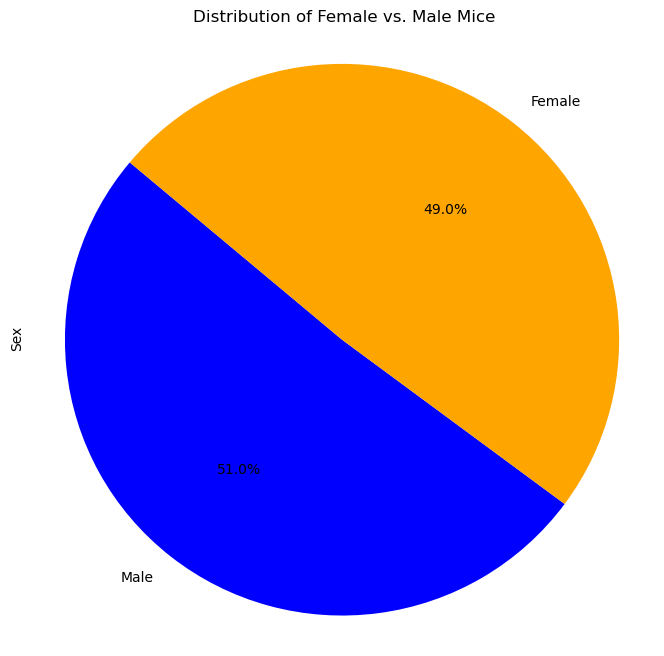

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_data["Sex"].value_counts()

# Generate a pie plot using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'],
                          figsize=(8, 8), startangle=140)

# Set plot title
plt.title('Distribution of Female vs. Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

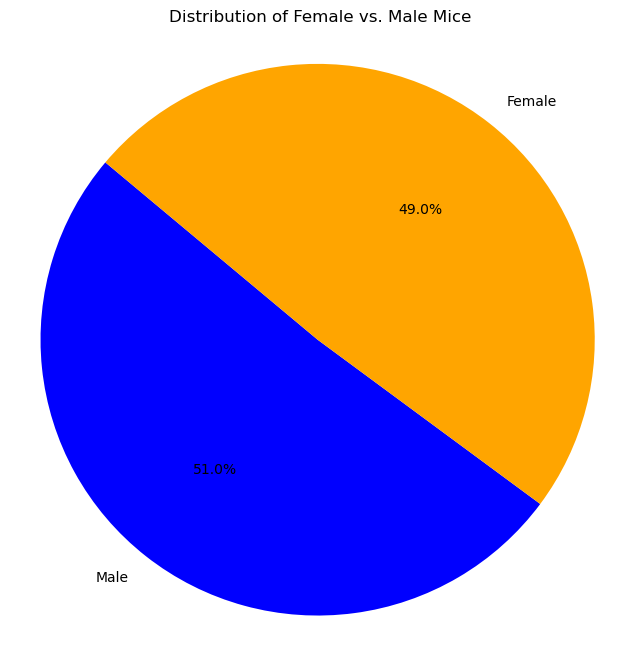

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_data["Sex"].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=140)

# Set plot title
plt.title('Distribution of Female vs. Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
selected_data = clean_data[clean_data["Drug Regimen"].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = selected_data.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=["Mouse ID", "Timepoint"], how="inner")
final_tumor_volume.head()

In [16]:
# Put treatments into a list
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty dictionary to store tumor volume data for each treatment
tumor_volume_data = {}

# Filter the data for the specified treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
selected_data = clean_data[clean_data["Drug Regimen"].isin(selected_regimens)]

# Group the selected data by Mouse ID and get the maximum timepoint for each mouse
last_timepoint = selected_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=["Mouse ID", "Timepoint"], how="inner")

# Display the DataFrame showing the final tumor volume of each mouse
final_tumor_volume.head()


# Loop through each treatment
for treatment in treatments:
    # Filter the data for the current treatment
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]
    
    # Get the tumor volumes for the current treatment
    tumor_volumes = treatment_data["Tumor Volume (mm3)"]
    
    # Add subset to the dictionary
    tumor_volume_data[treatment] = tumor_volumes
    
    # Calculate the quartiles and IQR for the current treatment
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print summary information for the current treatment
    print(f"Summary statistics for {treatment}:")
    print(f"  - Lower Quartile: {lowerq}")
    print(f"  - Upper Quartile: {upperq}")
    print(f"  - Interquartile Range (IQR): {iqr}")
    print(f"  - Median: {quartiles[0.5]}")
    print(f"  - Potential Outliers: {outliers.values}\n")

Summary statistics for Capomulin:
  - Lower Quartile: 32.37735684
  - Upper Quartile: 40.1592203
  - Interquartile Range (IQR): 7.781863460000004
  - Median: 38.1251644
  - Potential Outliers: []

Summary statistics for Ramicane:
  - Lower Quartile: 31.56046955
  - Upper Quartile: 40.65900627
  - Interquartile Range (IQR): 9.098536719999998
  - Median: 36.56165229
  - Potential Outliers: []

Summary statistics for Infubinol:
  - Lower Quartile: 54.04860769
  - Upper Quartile: 65.52574285
  - Interquartile Range (IQR): 11.477135160000003
  - Median: 60.16518046
  - Potential Outliers: [36.3213458]

Summary statistics for Ceftamin:
  - Lower Quartile: 48.72207785
  - Upper Quartile: 64.29983003
  - Interquartile Range (IQR): 15.577752179999997
  - Median: 59.85195552
  - Potential Outliers: []



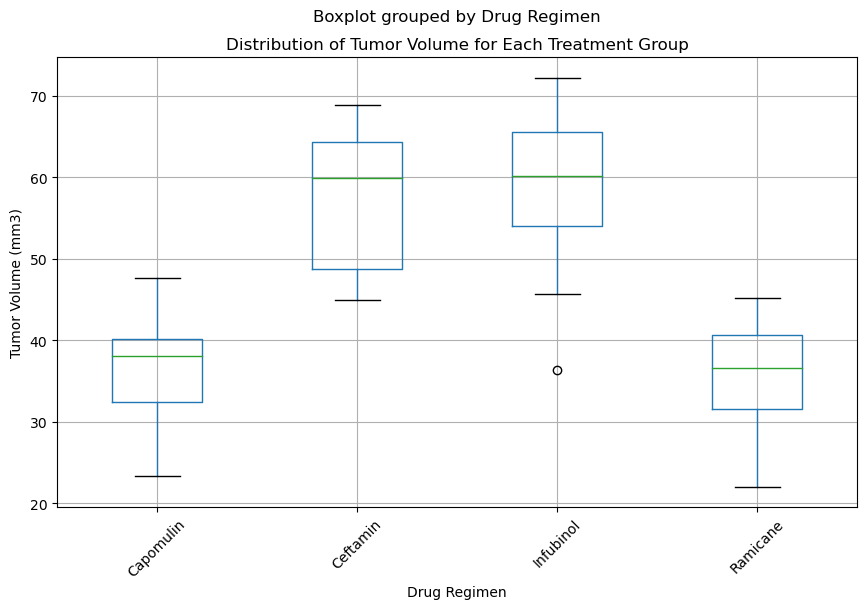

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
final_tumor_volume.boxplot(by='Drug Regimen', column='Tumor Volume (mm3)', figsize=(10, 6))

# Set plot title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Line and Scatter Plots

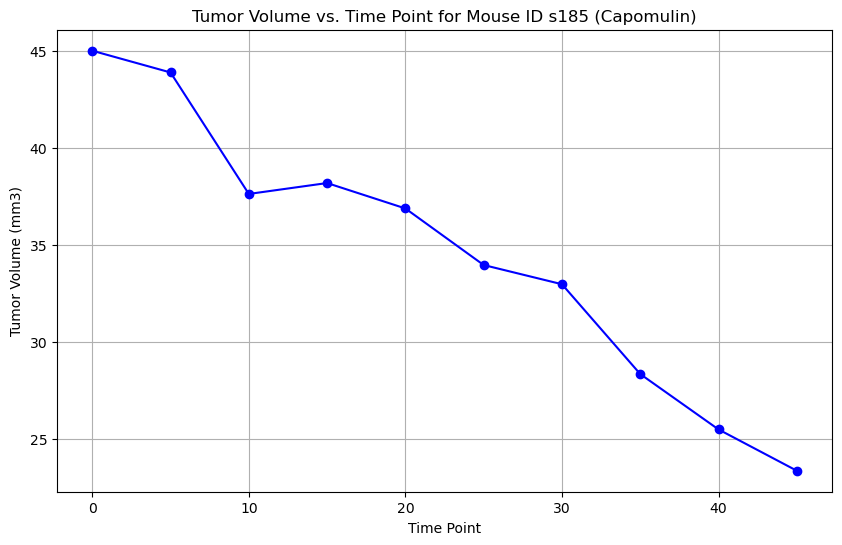

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 's185'
capomulin_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == mouse_id)]

# Plot tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], marker='o', color='blue', linestyle='-')

# Set plot title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.grid(True)
plt.show()

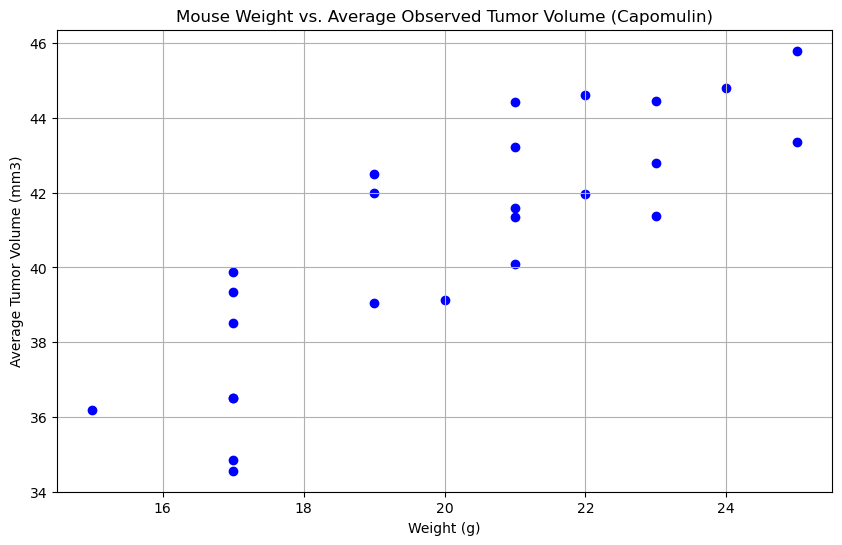

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = clean_data[clean_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Group the data by Mouse ID to calculate the average weight for each mouse
avg_weight = clean_data[clean_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)"].mean()

# Merge the two groupings on Mouse ID
avg_data = pd.merge(avg_tumor_volume, avg_weight, on="Mouse ID", suffixes=("_tumor", "_weight"))

# Plot the scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(avg_data["Weight (g)"], avg_data["Tumor Volume (mm3)"], color='blue')

# Set plot title and labels
plt.title('Mouse Weight vs. Average Observed Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.grid(True)
plt.show()

## Correlation and Regression

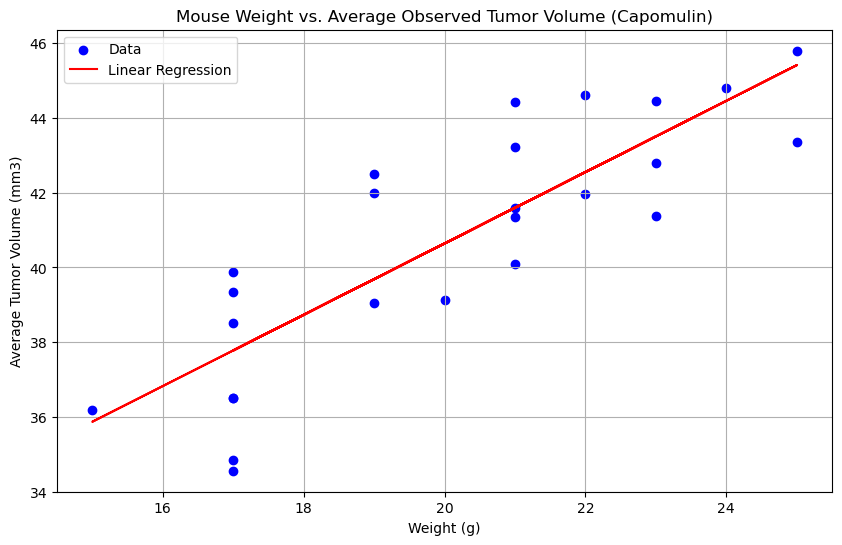

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(avg_data["Weight (g)"], avg_data["Tumor Volume (mm3)"], color='blue', label='Data')

# Plot the linear regression line
x_values = avg_data["Weight (g)"]
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label='Linear Regression')

# Set plot title and labels
plt.title('Mouse Weight vs. Average Observed Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()